In [1]:
from imutils import paths
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.special import softmax
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


2024-09-17 15:32:47.752138: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-09-17 15:32:49.647799: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-17 15:32:49.648969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-09-17 15:32:49.656048: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-17 15:32:49.656069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: gunner-ThinkPad-P52
2024-09-17 15:32:49.656075: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: gunner-ThinkPad-P52
2024-09-17 15:32:49.656159: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.171.4
2024-09-17 15:32:49.656179: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.171.4
2024-09-17 15:32:49.656185: I tensorflow/stream_executor/cud

In [3]:
tf.config.list_physical_devices('GPU')

[]

#**Fetching**

In [4]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-09-17 15:32:49.692706: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 15:32:49.693546: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Loaded FR0... 6066 files has loaded.


In [5]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [6]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**EDA**

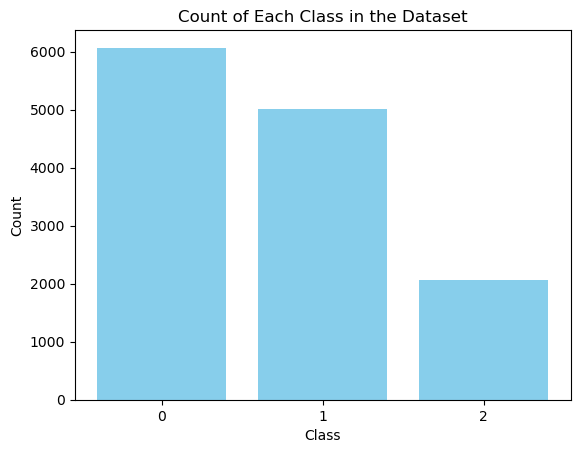

In [7]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [8]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

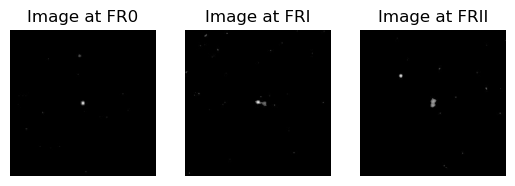

In [9]:
image = np.squeeze(data[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

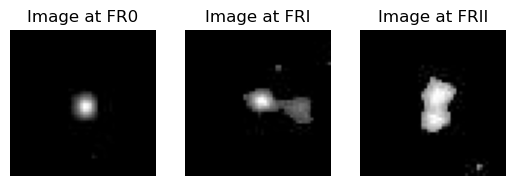

In [10]:
image = np.squeeze(data_cropped[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data_cropped[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data_cropped[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

In [11]:
data.shape, data_cropped.shape

((13140, 300, 300, 1), (13140, 50, 50, 1))

In [12]:
np.min(data_cropped[0]), np.max(data_cropped[0])

(0, 248)

#**Preprocessing**

In [13]:
data_normalized = data_cropped / 255

In [14]:
print(f'Min of original = {np.min(data_cropped[0])}')
print(f'Max of original = {np.max(data_cropped[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


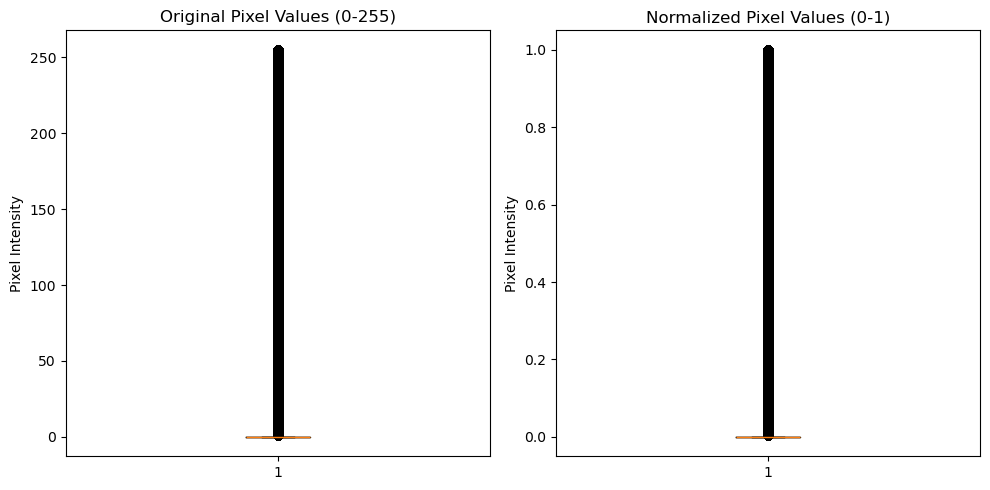

In [15]:
cropped_flat = data_cropped.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [16]:
x = data_normalized
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9198, 50, 50, 1), (9198,), (3942, 50, 50, 1), (3942,))

In [17]:
x_train_flatten = tf.reshape(x_train, (9198, -1))
x_test_flatten = tf.reshape(x_test, (3942, -1))

In [18]:
x_train_flatten.shape, x_train.shape, x_test_flatten.shape, x_test.shape

(TensorShape([9198, 2500]),
 (9198, 50, 50, 1),
 TensorShape([3942, 2500]),
 (3942, 50, 50, 1))

#PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)


In [20]:
x_train_pca.shape

(9198, 32)

#**Model definition**

In [76]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu', input_shape=(32, 1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dropout(0.1))


model.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))


#Model Compiling
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Builing and Summury
model.build(input_shape=(None, 32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)               

In [77]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [78]:
import time

start = time.perf_counter()
hist = model.fit(x_train_pca, y_train, batch_size=32, epochs=50, validation_data=(x_test_pca, y_test), callbacks=early_stopping)
end = time.perf_counter()

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 1.1394 - accuracy: 0.4375 - val_loss: 0.9913 - val_accuracy: 0.5870
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.9673 - accuracy: 0.5535 - val_loss: 0.7696 - val_accuracy: 0.7212
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.8007 - accuracy: 0.6692 - val_loss: 0.6463 - val_accuracy: 0.7593
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.7235 - val_loss: 0.5829 - val_accuracy: 0.7770
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.6473 - accuracy: 0.7400 - val_loss: 0.5565 - val_accuracy: 0.7818
Epoch 6/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.7567 - val_loss: 0.5424 - val_accuracy: 0.7902
Epoch 7/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6173 - accuracy: 0.7543 - val_loss: 0.5338 - val_accuracy: 0.7940
Epoch 

In [79]:
end - start

31.15151388200138

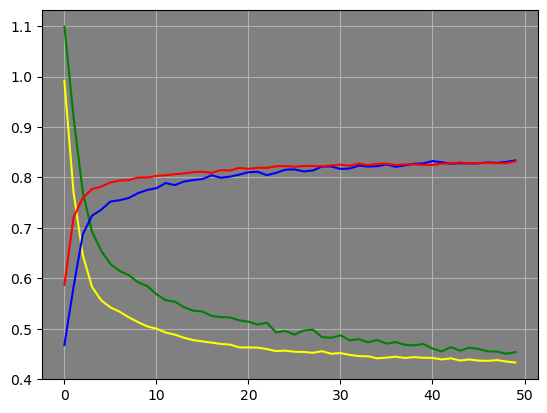

In [80]:
plt.axes().set_facecolor('gray')
plt.grid('True')

loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss, color='green')
plt.plot(val_loss, color='yellow')

acc_hist_train = hist.history['accuracy']
val_acc_hist_test = hist.history['val_accuracy']
plt.plot(acc_hist_train, color='blue')
plt.plot(val_acc_hist_test, color='red')



plt.show()


In [81]:
y_pred_train = model.predict(x_train_pca)
y_pred_test = model.predict(x_test_pca)

index_train = random.randint(0, 9198)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train[index_train]}')

index_test = random.randint(0, 3948)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test[index_test]}')

y_train: 1 y_pred_train:[0.10711178 0.62109506 0.2717931 ]
y_test: 1 y_pred_test:[0.04655638 0.9222425  0.03120116]


In [82]:

y_pred_train_smax = softmax(y_pred_train, axis=1)
y_pred_test_smax = softmax(y_pred_test, axis=1)
 
y_pred_train_smax = np.argmax(y_pred_train_smax, axis=1)
y_pred_test_smax = np.argmax(y_pred_test_smax, axis=1)


y_pred_test_smax.shape, y_pred_train_smax.shape

((3942,), (9198,))

In [83]:
index_train = random.randint(0, 9198)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train_smax[index_train]}')

index_test = random.randint(0, 3948)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test_smax[index_test]}')

y_train: 0 y_pred_train:0
y_test: 1 y_pred_test:1


In [84]:

acc_train = accuracy_score(y_train, y_pred_train_smax)
acc_test = accuracy_score(y_test, y_pred_test_smax)

p = precision_score(y_test, y_pred_test_smax, average='micro')
r = recall_score(y_test, y_pred_test_smax, average='micro')


print(f'Acc Train: {acc_train} - Acc Test: {acc_test} - Percision: {p} - Recall: {r}')

Acc Train: 0.8540987171124157 - Acc Test: 0.8320649416539827 - Percision: 0.8320649416539827 - Recall: 0.8320649416539827


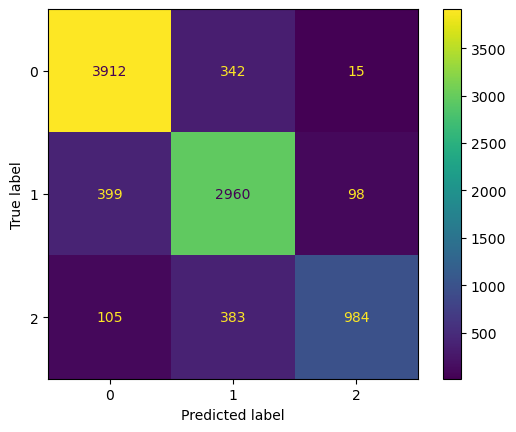

In [85]:
con_mat_train = confusion_matrix(y_train, y_pred_train_smax)

disp = ConfusionMatrixDisplay(con_mat_train)

disp.plot()

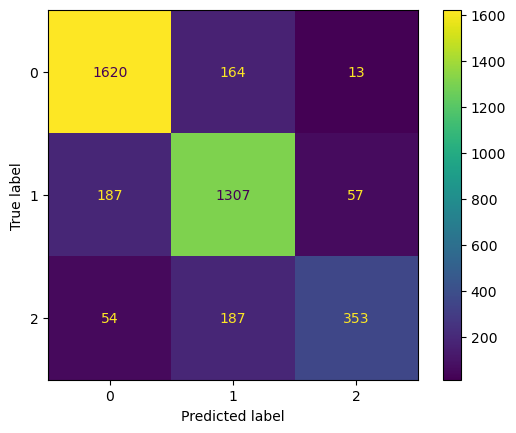

In [86]:
con_mat_test = confusion_matrix(y_test, y_pred_test_smax)

disp = ConfusionMatrixDisplay(con_mat_test)

disp.plot()